In [1]:
import numpy as np
import pandas as pd
import os 


In [2]:





import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



kaggle/Network Anamoly Detection.docx
kaggle/Test.txt
kaggle/Train.txt


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("kaggle/Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df.head()


,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
df.shape

(125973, 43)

In [6]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [7]:
#most of them have zero values
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)


In [8]:
#checking for null values
df.isna().sum()


duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

In [9]:
#checking which of the features are categorical
df.select_dtypes(exclude=[np.number])


,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
125968,tcp,private,S0,neptune
125969,udp,private,SF,normal
125970,tcp,smtp,SF,normal
125971,tcp,klogin,S0,neptune


In [10]:

df['attack'].loc[df['attack']!='normal']='attack'


In [11]:
le=LabelEncoder()


In [12]:
df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['attack']=le.fit_transform(df['attack'])

In [13]:
X=df.drop(['attack'],axis=1)
y=df['attack']

<AxesSubplot:xlabel='attack', ylabel='count'>

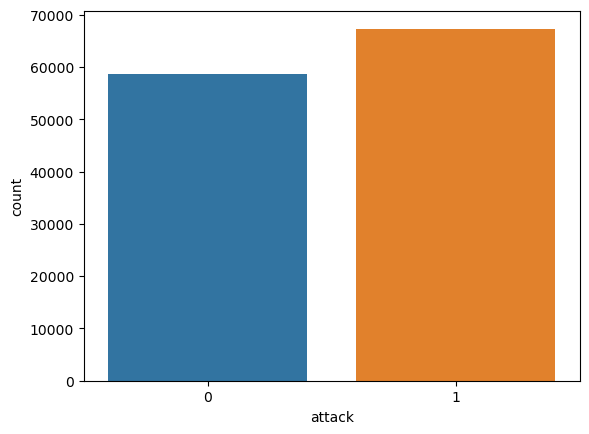

In [14]:
sns.countplot(df['attack'])


In [15]:
print("Class distribution: {}".format(Counter(y)))


Class distribution: Counter({1: 67343, 0: 58630})


In [16]:
#scaling the data
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)


In [17]:
import keras
import keras.layers as layers
from keras.models import *

In [18]:
X.shape


(125973, 38)

# PCA

In [19]:
#Pca
from sklearn.decomposition import PCA
pca = PCA(n_components=38)
pca.fit(X_transformed)

PCA(n_components=38)

Text(0, 0.5, 'Explained variance')

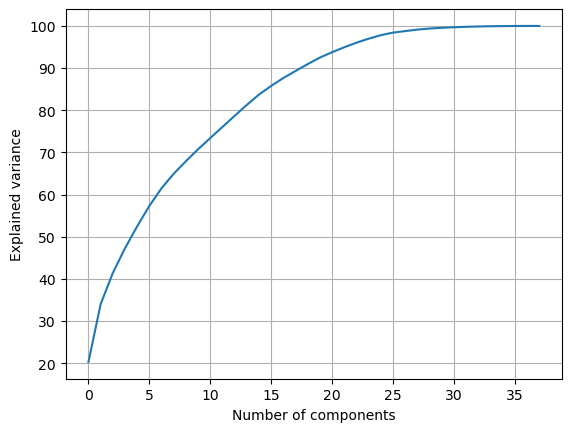

In [20]:
plt.grid()
plt.plot(pca.explained_variance_ratio_.cumsum()*100)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [21]:
pca_20 = PCA(n_components=20)

pca_20.fit(X_transformed)

x_train_reduced = pca_20.transform(X_transformed)


In [22]:
import numpy as np
print("\nVar retained (%):", 
      np.sum(pca_20.explained_variance_ratio_ * 100))


Var retained (%): 92.51154222628831


In [23]:
 y.shape

# Print the number of columns
print("Number of columns in y:", y.shape)

Number of columns in y: (125973,)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from keras.losses import CategoricalCrossentropy
from keras.metrics import Accuracy
import pandas as pd
from keras.activations import relu, sigmoid , softmax
from keras.models import Sequential 
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import InputLayer,Dropout,Dense,Activation

In [25]:
#from tensorflow import keras
#from tensorflow.keras import layers

#model = keras.Sequential([
#   layers.InputLayer(input_shape=(X_transformed.shape[1])),  # Removed the first dimension (125973)
#   layers.Dense(32, activation='relu'),
#   layers.Dense(64, activation='relu'),
#   layers.Dense(128,activation='relu'),
#   layers.Dense(64,activation='relu'),
#   layers.Dense(32, activation='relu'),
#   layers.Dense(1, activation='sigmoid')

    

#])
def create_model(layers,activation,dropout_rate):
  model = Sequential()
  for i,nodes in enumerate(layers):
    if i == 0 :
      model.add(Dense(nodes,input_dim=x_train_reduced.shape[1]))
      model.add(Activation(activation))
    else:
      model.add(Dropout(dropout_rate))
      model.add(Dense(nodes))
      model.add(Activation(activation))
      model.add(Dropout(dropout_rate))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model,verbose=2)




          

In [26]:
#compiling and fitting the model
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#model.fit(X_transformed, y, batch_size=32, epochs=10)
from datetime import datetime as dt

layers = [[32,64,32],[32,64,128,64,32]]
activations = ['relu']
dropout_rate = [0.2,0.4,0.5]
param_grid = dict(layers=layers,activation=activations,dropout_rate=dropout_rate,batch_size=[32,64,128],epochs=[10,20])
grid = HalvingGridSearchCV(estimator=model,param_grid=param_grid)
start1 = dt.now()
grid.fit(x_train_reduced,y)
running_secs1_grid = (dt.now() - start1).seconds



Epoch 1/10
117/117 - 1s - loss: 0.3789 - accuracy: 0.8531
Epoch 2/10
117/117 - 0s - loss: 0.1232 - accuracy: 0.9568
Epoch 3/10
117/117 - 0s - loss: 0.0988 - accuracy: 0.9657
Epoch 4/10
117/117 - 0s - loss: 0.0764 - accuracy: 0.9716
Epoch 5/10
117/117 - 0s - loss: 0.0675 - accuracy: 0.9767
Epoch 6/10
117/117 - 0s - loss: 0.0606 - accuracy: 0.9767
Epoch 7/10
117/117 - 0s - loss: 0.0553 - accuracy: 0.9810
Epoch 8/10
117/117 - 0s - loss: 0.0468 - accuracy: 0.9834
Epoch 9/10
117/117 - 0s - loss: 0.0456 - accuracy: 0.9834
Epoch 10/10
117/117 - 0s - loss: 0.0374 - accuracy: 0.9866
30/30 - 0s - loss: 0.0300 - accuracy: 0.9904
117/117 - 0s - loss: 0.0228 - accuracy: 0.9930
Epoch 1/10
117/117 - 1s - loss: 0.3728 - accuracy: 0.8622
Epoch 2/10
117/117 - 0s - loss: 0.2072 - accuracy: 0.9437
Epoch 3/10
117/117 - 0s - loss: 0.1000 - accuracy: 0.9595
Epoch 4/10
117/117 - 0s - loss: 0.0803 - accuracy: 0.9697
Epoch 5/10
117/117 - 0s - loss: 0.0650 - accuracy: 0.9753
Epoch 6/10
117/117 - 0s - loss: 0.064

In [27]:
#best model 
[grid.best_params_,grid.best_score_]

[{'activation': 'relu',
  'batch_size': 32,
  'dropout_rate': 0.2,
  'epochs': 20,
  'layers': [32, 64, 32]},
 0.9968718528747559]

In [28]:
model = create_model(layers=grid.best_params_['layers'], activation=grid.best_params_['activation'],dropout_rate=grid.best_params_['dropout_rate'])

In [29]:
model.summary()



Model: "sequential_271"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1344 (Dense)           (None, 32)                672       
_________________________________________________________________
activation_1073 (Activation) (None, 32)                0         
_________________________________________________________________
dropout_1604 (Dropout)       (None, 32)                0         
_________________________________________________________________
dense_1345 (Dense)           (None, 64)                2112      
_________________________________________________________________
activation_1074 (Activation) (None, 64)                0         
_________________________________________________________________
dropout_1605 (Dropout)       (None, 64)                0         
_________________________________________________________________
dropout_1606 (Dropout)       (None, 64)             

Epoch 1/50
3150/3150 - 7s - loss: 0.0647 - accuracy: 0.9791 - val_loss: 0.0160 - val_accuracy: 0.9948
Epoch 2/50
3150/3150 - 6s - loss: 0.0248 - accuracy: 0.9915 - val_loss: 0.0132 - val_accuracy: 0.9959
Epoch 3/50
3150/3150 - 6s - loss: 0.0197 - accuracy: 0.9931 - val_loss: 0.0121 - val_accuracy: 0.9962
Epoch 4/50
3150/3150 - 6s - loss: 0.0176 - accuracy: 0.9938 - val_loss: 0.0112 - val_accuracy: 0.9964
Epoch 5/50
3150/3150 - 5s - loss: 0.0159 - accuracy: 0.9944 - val_loss: 0.0114 - val_accuracy: 0.9966
Epoch 6/50
3150/3150 - 5s - loss: 0.0145 - accuracy: 0.9950 - val_loss: 0.0105 - val_accuracy: 0.9966
Epoch 7/50
3150/3150 - 6s - loss: 0.0151 - accuracy: 0.9947 - val_loss: 0.0105 - val_accuracy: 0.9967
Epoch 8/50
3150/3150 - 5s - loss: 0.0173 - accuracy: 0.9948 - val_loss: 0.0108 - val_accuracy: 0.9967
Epoch 9/50
3150/3150 - 6s - loss: 0.0139 - accuracy: 0.9951 - val_loss: 0.0103 - val_accuracy: 0.9969
Epoch 10/50
3150/3150 - 5s - loss: 0.0159 - accuracy: 0.9952 - val_loss: 0.0095 - 

,loss,accuracy,val_loss,val_accuracy
0,0.064717,0.979083,0.016016,0.994801
1,0.024840,0.991496,0.013175,0.995912
2,0.019667,0.993094,0.012089,0.996190
3,0.017579,0.993778,0.011153,0.996428
4,0.015894,0.994364,0.011444,0.996587
5,0.014463,0.994969,0.010541,0.996626
6,0.015055,0.994662,0.010513,0.996745
7,0.017331,0.994771,0.010817,0.996745
8,0.013857,0.995068,0.010267,0.996944
9,0.015911,0.995178,0.009523,0.997023


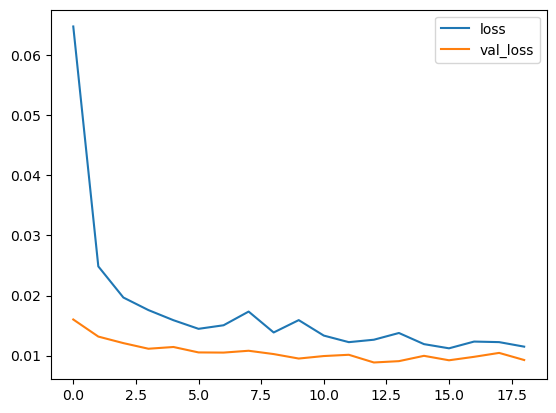

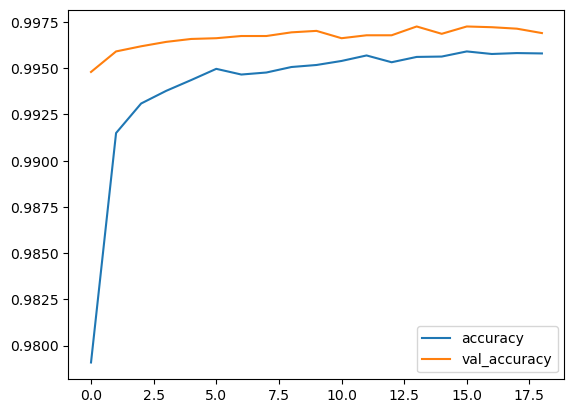

In [30]:
early_stopping = EarlyStopping(
    min_delta=0., # minimium amount of change to count as an improvement
    patience=6, # how many epochs to wait before stopping
    restore_best_weights=True,
)
start2 = dt.now()

history = model.fit(x_train_reduced, y,
                        epochs=50,
                        batch_size=32,
                        validation_split=0.2,
                        callbacks = [early_stopping],
                        verbose = 2)
running_secs2_grid = (dt.now() - start2).seconds
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
history_frame.loc[:,]

In [31]:
from sklearn.metrics import accuracy_score



In [33]:
test_df = pd.read_csv("kaggle/Test.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])

test_df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [34]:
test_df.select_dtypes(exclude=[np.number])


,protocoltype,service,flag,attack
0,tcp,private,REJ,neptune
1,tcp,private,REJ,neptune
2,tcp,ftp_data,SF,normal
3,icmp,eco_i,SF,saint
4,tcp,telnet,RSTO,mscan
...,...,...,...,...
22539,tcp,smtp,SF,normal
22540,tcp,http,SF,normal
22541,tcp,http,SF,back
22542,udp,domain_u,SF,normal


In [35]:
test_df['attack'].loc[test_df['attack']!='normal']='attack'


In [36]:
test_df['protocoltype']=le.fit_transform(test_df['protocoltype'])
test_df['service']=le.fit_transform(test_df['service'])
test_df['flag']=le.fit_transform(test_df['flag'])
test_df['attack']=le.fit_transform(test_df['attack'])

In [37]:
test_df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)



In [38]:
X_test=test_df.drop(['attack'],axis=1)
y_test=test_df['attack']





<AxesSubplot:xlabel='attack', ylabel='count'>

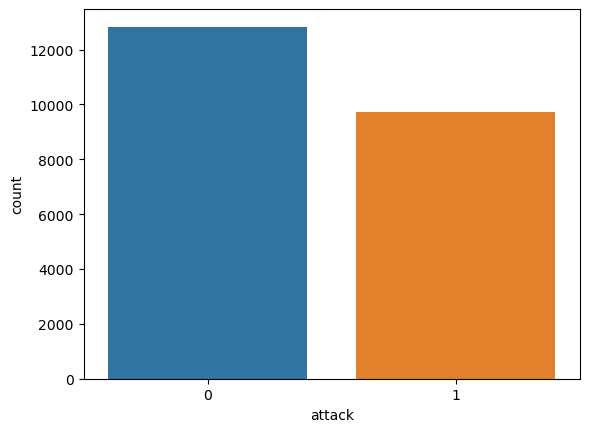

In [39]:

sns.countplot(test_df['attack'])


In [40]:
X_test_transformed = scaler.transform(X_test)



In [41]:
x_test_reduced = pca_20.transform(X_test_transformed)



In [42]:
predictions1=  np.round(model.predict(x_test_reduced))


In [43]:
from sklearn.metrics import accuracy_score

# Assuming you have the true labels in y_true and predicted labels in y_pred
accuracy = accuracy_score(y_test, predictions1)


# Accuracy for model 1

In [44]:
print(accuracy)

0.8520670688431512


# Experimenting with other models


In [45]:
model2 = create_model(layers=[32,64,128,64,32], activation='relu',dropout_rate=0)

In [46]:
model2.summary()

Model: "sequential_272"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1348 (Dense)           (None, 32)                672       
_________________________________________________________________
activation_1076 (Activation) (None, 32)                0         
_________________________________________________________________
dropout_1608 (Dropout)       (None, 32)                0         
_________________________________________________________________
dense_1349 (Dense)           (None, 64)                2112      
_________________________________________________________________
activation_1077 (Activation) (None, 64)                0         
_________________________________________________________________
dropout_1609 (Dropout)       (None, 64)                0         
_________________________________________________________________
dropout_1610 (Dropout)       (None, 64)             

Epoch 1/50
1575/1575 - 3s - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.0127 - val_accuracy: 0.9959
Epoch 2/50
1575/1575 - 3s - loss: 0.0138 - accuracy: 0.9950 - val_loss: 0.0175 - val_accuracy: 0.9940
Epoch 3/50
1575/1575 - 3s - loss: 0.0111 - accuracy: 0.9958 - val_loss: 0.0168 - val_accuracy: 0.9936
Epoch 4/50
1575/1575 - 3s - loss: 0.0100 - accuracy: 0.9960 - val_loss: 0.0101 - val_accuracy: 0.9969
Epoch 5/50
1575/1575 - 3s - loss: 0.0096 - accuracy: 0.9963 - val_loss: 0.0103 - val_accuracy: 0.9969
Epoch 6/50
1575/1575 - 3s - loss: 0.0086 - accuracy: 0.9966 - val_loss: 0.0100 - val_accuracy: 0.9969
Epoch 7/50
1575/1575 - 3s - loss: 0.0079 - accuracy: 0.9970 - val_loss: 0.0111 - val_accuracy: 0.9965
Epoch 8/50
1575/1575 - 3s - loss: 0.0079 - accuracy: 0.9970 - val_loss: 0.0089 - val_accuracy: 0.9967
Epoch 9/50
1575/1575 - 3s - loss: 0.0072 - accuracy: 0.9972 - val_loss: 0.0085 - val_accuracy: 0.9973
Epoch 10/50
1575/1575 - 3s - loss: 0.0067 - accuracy: 0.9975 - val_loss: 0.0095 - 

,loss,accuracy,val_loss,val_accuracy
0,0.030411,0.990028,0.012743,0.995912
1,0.013797,0.994959,0.017483,0.994046
2,0.011147,0.995753,0.016811,0.993570
3,0.010039,0.996021,0.010055,0.996904
4,0.009635,0.996289,0.010328,0.996944
5,0.008603,0.996596,0.009968,0.996944
6,0.007942,0.997023,0.011104,0.996507
7,0.007862,0.997043,0.008928,0.996706
8,0.007160,0.997192,0.008473,0.997261
9,0.006688,0.997460,0.009457,0.997103


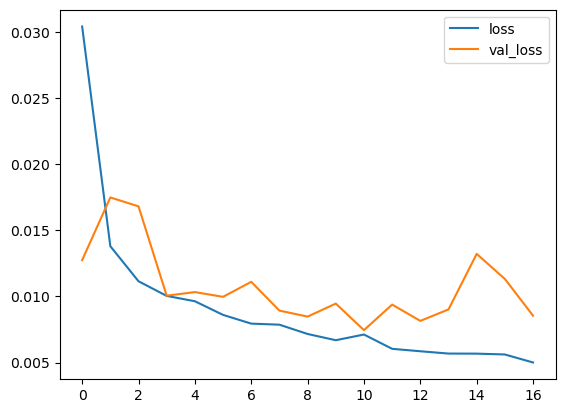

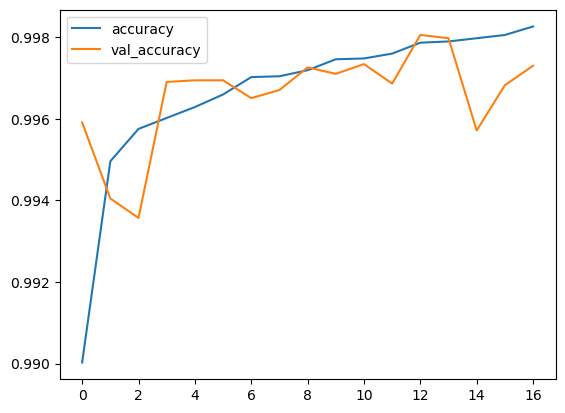

In [47]:
history = model2.fit(x_train_reduced, y,
                        epochs=50,
                        batch_size=64,
                        validation_split=0.2,
                        callbacks = [early_stopping],
                        verbose = 2)
running_secs2_grid = (dt.now() - start2).seconds
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
history_frame.loc[:,]

In [48]:

predictions2=  np.round(model2.predict(x_test_reduced))
accuracy2 = accuracy_score(y_test, predictions2)
print("accuracy model 2: ",accuracy2)


accuracy model 2:  0.8698101490418737


# Naive Bayers model 

In [49]:

from sklearn.naive_bayes import GaussianNB




In [50]:
model4 = GaussianNB()


In [51]:
model4.fit(x_train_reduced, y)


GaussianNB()

In [52]:
accuracy4 = model4.score(x_test_reduced, y_test)


In [53]:
print('naive accuracy:', accuracy)


naive accuracy: 0.8520670688431512


#  LSTM

In [54]:
x_train = np.reshape(x_train_reduced, (x_train_reduced.shape[0], 20, 1))

# Define the LSTM model
model_lstm = keras.Sequential([
    keras.layers.LSTM(64, input_shape=(20, 1)),
    

    keras.layers.Dense(1, activation='sigmoid')
])


In [55]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(x_train, y, epochs=10, batch_size=64)

Epoch 1/10
1969/1969 [==============================] - 19s 9ms/step - loss: 0.1631 - accuracy: 0.9371
Epoch 2/10
1969/1969 [==============================] - 19s 10ms/step - loss: 0.0406 - accuracy: 0.9863
Epoch 3/10
1969/1969 [==============================] - 19s 10ms/step - loss: 0.0257 - accuracy: 0.9911
Epoch 4/10
1969/1969 [==============================] - 19s 10ms/step - loss: 0.0197 - accuracy: 0.9931
Epoch 5/10
1969/1969 [==============================] - 19s 10ms/step - loss: 0.0172 - accuracy: 0.9936
Epoch 6/10
1969/1969 [==============================] - 19s 10ms/step - loss: 0.0151 - accuracy: 0.9943
Epoch 7/10
1969/1969 [==============================] - 20s 10ms/step - loss: 0.0147 - accuracy: 0.9946
Epoch 8/10
1969/1969 [==============================] - 20s 10ms/step - loss: 0.0121 - accuracy: 0.9952
Epoch 9/10
1969/1969 [==============================] - 20s 10ms/step - loss: 0.0118 - accuracy: 0.9953
Epoch 10/10
1969/1969 [==============================] - 21s 11ms

In [57]:
x_test = np.reshape(x_test_reduced, (x_test_reduced.shape[0], 20, 1))

predictions_lstm=  np.round(model_lstm.predict(x_test))
accuracy_lstm = accuracy_score(y_test, predictions_lstm)



In [58]:
print("lstm accuracy:",accuracy_lstm)

lstm accuracy: 0.853042938254081
